In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D 
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet
from scipy.spatial.distance import pdist
from sklearn.metrics import silhouette_score


In [2]:
df = pd.read_csv('C:/Users/ThinkPad/OneDrive/Documents/SDPI/Customer Segmentation.txt', delimiter="\t")
df.head()

,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun
0,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927
1,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700
2,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429
3,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498
4,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206


df info:

In [3]:
df.shape

(50, 7)

In [4]:
df.columns

Index(['Customer_ID', 'Nama Pelanggan', 'Jenis Kelamin', 'Umur', 'Profesi',
       'Tipe Residen', 'NilaiBelanjaSetahun'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-null     object
 3   Umur                 50 non-null     int64 
 4   Profesi              50 non-null     object
 5   Tipe Residen         50 non-null     object
 6   NilaiBelanjaSetahun  50 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 2.9+ KB


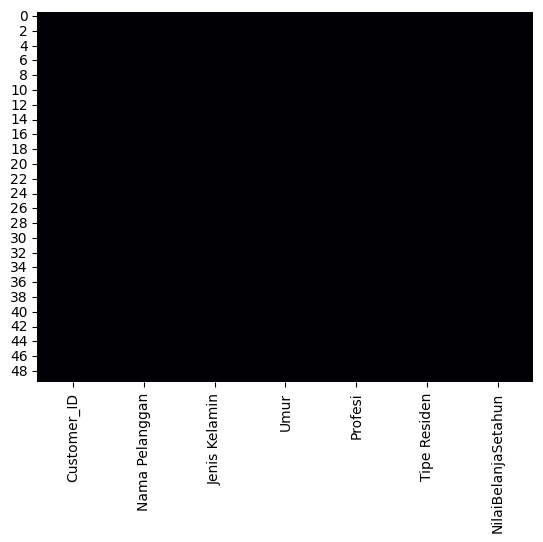

In [6]:
sns.heatmap(df.isnull(),cmap = 'magma',cbar = False);

In [7]:
df.describe()

,Umur,NilaiBelanjaSetahun
count,50.000000,5.000000e+01
mean,37.500000,7.069875e+06
std,14.673661,2.590619e+06
min,14.000000,2.722700e+06
25%,25.000000,5.257530e+06
50%,35.000000,5.980077e+06
75%,49.750000,9.739615e+06
max,64.000000,1.088451e+07


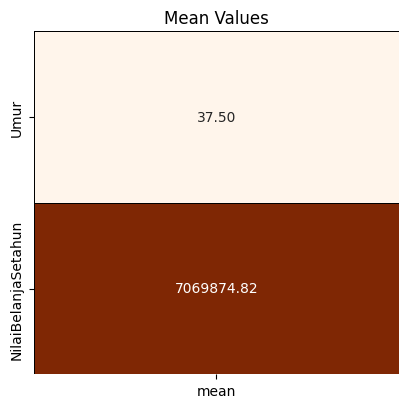

In [8]:
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5))

colors = ['#FF781F','#2D2926']
plt.subplot(1,1,1)
sns.heatmap(df.describe().T[['mean']],cmap = 'Oranges',annot = True,fmt = '.2f',linecolor = 'black',linewidths = 0.4,cbar = False);
plt.title('Mean Values');

fig.tight_layout(pad = 4)

EDA

In [9]:
len(df['Customer_ID'].unique()) == len(df)

True

In [10]:
df = df.drop(columns=['Customer_ID', 'Nama Pelanggan'])
col = list(df.columns)
col.remove('Umur')
col.remove('NilaiBelanjaSetahun')
numerical_features = ['Umur', 'NilaiBelanjaSetahun']
categorical_features = [*col]

print('Categorical Features:', *categorical_features)
print('Numerical Features:', *numerical_features)


Categorical Features: Jenis Kelamin Profesi Tipe Residen
Numerical Features: Umur NilaiBelanjaSetahun


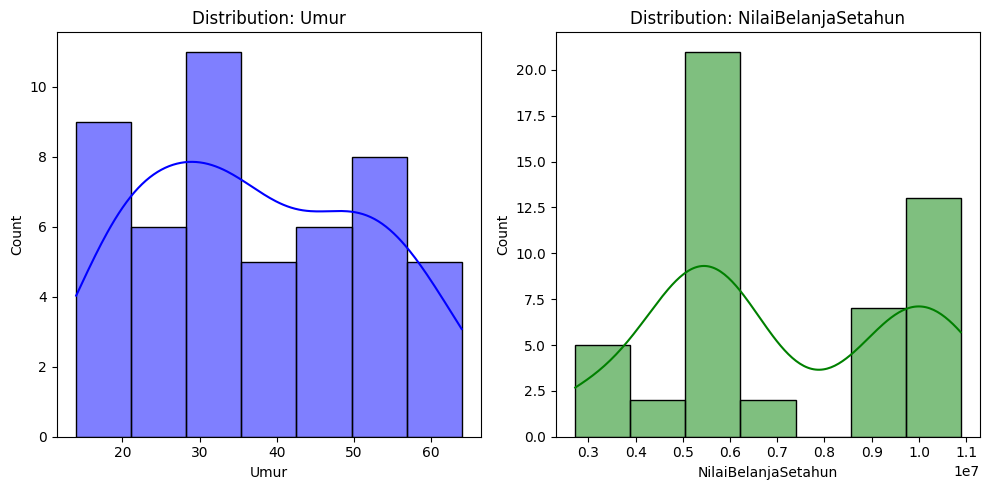

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
colors = ['blue', 'green']  
for i, col in enumerate(numerical_features):  
    sns.histplot(df[col], ax=ax[i], color=colors[i], kde=True)  
    ax[i].set_title(f'Distribution: {col}')

plt.tight_layout()
plt.show()

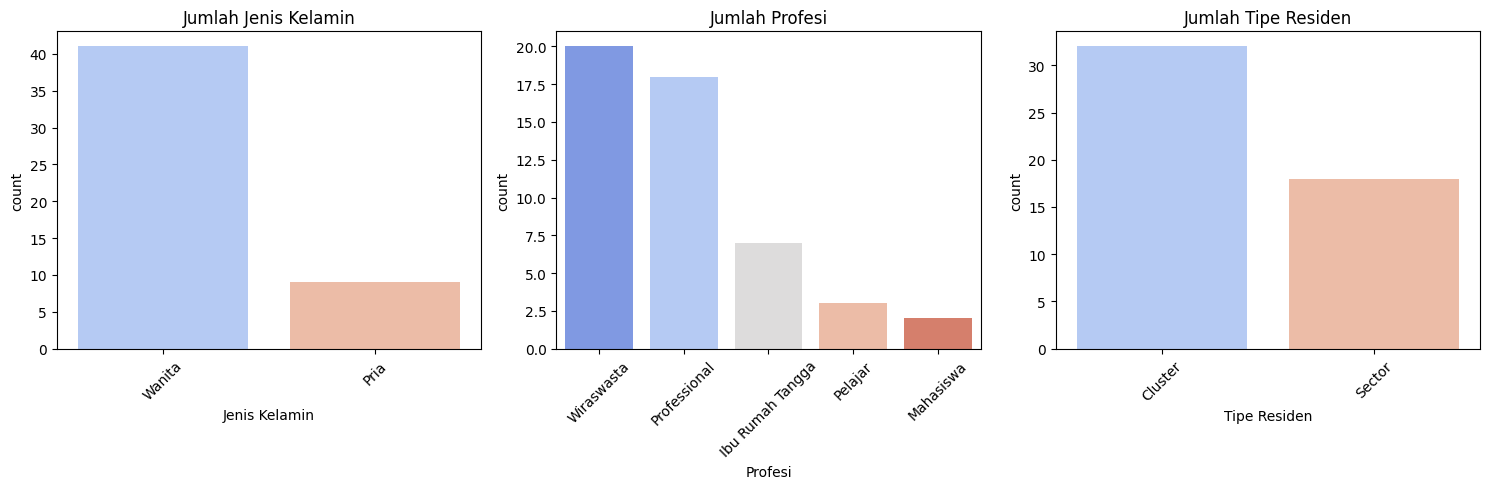

In [12]:
categorical_cols = categorical_features

plt.figure(figsize=(15, 5))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, len(categorical_cols), i)
    sns.countplot(x=df[col], palette='coolwarm', order=df[col].value_counts().index)
    plt.title(f'Jumlah {col}')
    plt.xticks(rotation=45)  # Rotasi label agar tidak bertumpuk

plt.tight_layout()
plt.show()


Numerical feature

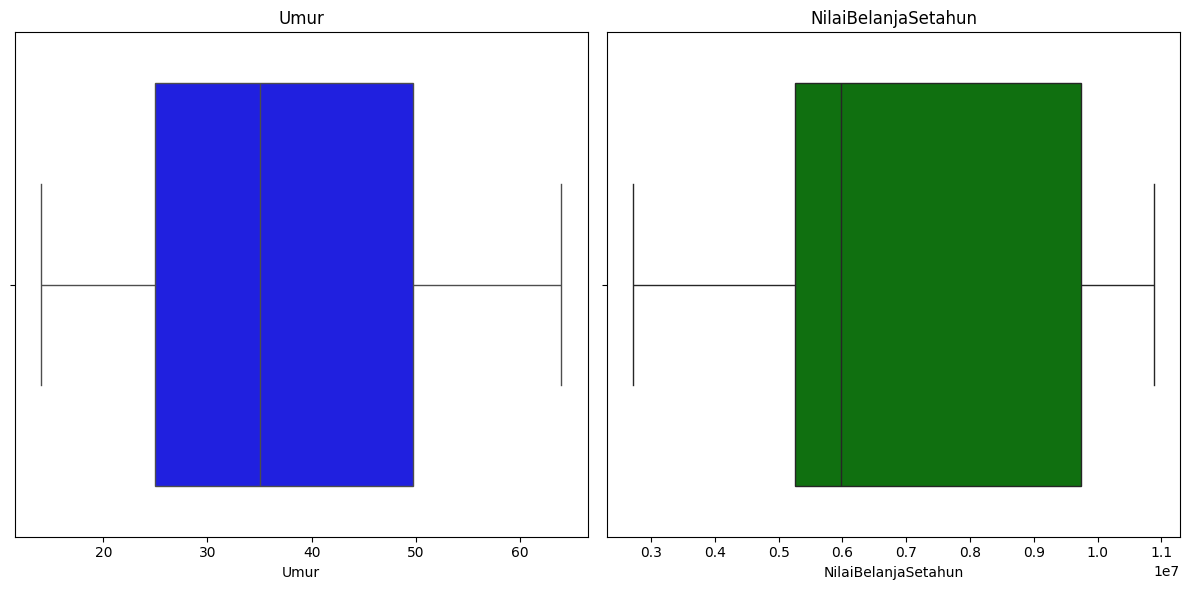

In [13]:
colors = ['blue', 'green']


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
for i, col in enumerate(numerical_features):
    sns.boxplot(x=df[col], ax=ax[i], color=colors[i])  
    ax[i].set_title(col)

plt.tight_layout()
plt.show()


Feature Enginering 

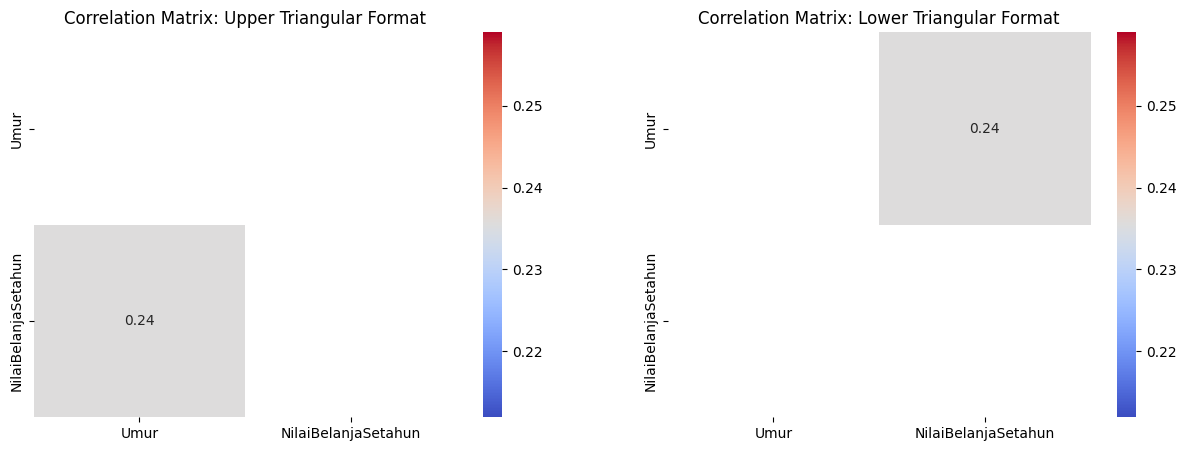

In [14]:
numerical_df = df[numerical_features]  
corr_matrix = numerical_df.corr()
ut = np.triu(corr_matrix)
lt = np.tril(corr_matrix)

# Plot heatmap
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, cbar=True, mask=ut)
plt.title('Correlation Matrix: Upper Triangular Format')

plt.subplot(1, 2, 2)
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, cbar=True, mask=lt)
plt.title('Correlation Matrix: Lower Triangular Format')

plt.show()


Data Preprocessing

In [15]:
mms = MinMaxScaler()
numerical_cols = numerical_features
df[numerical_cols] = mms.fit_transform(df[numerical_cols])
df.head()

,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun
0,Pria,0.88,Wiraswasta,Sector,0.830113
1,Wanita,0.00,Pelajar,Cluster,0.000000
2,Pria,0.68,Professional,Cluster,0.314113
3,Pria,0.78,Professional,Cluster,0.304075
4,Wanita,0.54,Wiraswasta,Cluster,0.967005


In [16]:
oe = OrdinalEncoder(categories=[['Pelajar', 'Mahasiswa', 'Ibu Rumah Tangga', 'Wiraswasta', 'Professional']])
df['Profesi'] = oe.fit_transform(df[['Profesi']])

le = LabelEncoder()
df['Tipe Residen'] = le.fit_transform(df['Tipe Residen'])

encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_cols = encoder.fit_transform(df[['Jenis Kelamin']])
df_encoded = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(['Jenis Kelamin']))
df = df.join(df_encoded).drop(columns=['Jenis Kelamin'])

Modelling

In [17]:
# Misalkan df sudah merupakan dataset numerik dan sudah di-scale
X = df.values  

# Definisikan grid parameter untuk tuning
n_clusters_options = [2, 3, 4, 5, 6, 7, 8, 9]      # Contoh jumlah cluster yang dicoba
linkage_options = ['ward', 'complete', 'average', 'single']
metric_options = ['cityblock', 'chebyshev', 'mahalanobis', 'matching', 'hamming', 'braycurtis', 'jaccard', 'l2', 'euclidean', 'l1', 'rogerstanimoto', 'sokalmichener', 'correlation', 'minkowski', 'russellrao', 'precomputed', 'wminkowski', 'nan_euclidean', 'canberra', 'cosine', 'sokalsneath', 'manhattan', 'seuclidean', 'dice', 'haversine', 'yule', 'sqeuclidean'] 

best_score = -1
best_params = {}

for n_clusters in n_clusters_options:
    for linkage in linkage_options:
        for metric in metric_options:
            # Ward hanya mendukung metric 'euclidean'
            if linkage == 'ward' and metric != 'euclidean':
                continue
            try:
                # Inisialisasi model dengan parameter saat ini
                model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage, metric=metric)
                labels = model.fit_predict(X)
                
                # Pastikan model menghasilkan minimal 2 cluster (agar silhouette score valid)
                if len(np.unique(labels)) < 2:
                    continue
                
                # Hitung silhouette score untuk evaluasi
                score = silhouette_score(X, labels, metric=metric)
                print(f"n_clusters={n_clusters}, linkage={linkage}, metric={metric}, silhouette_score={score:.4f}")
                
                # Simpan parameter terbaik berdasarkan score tertinggi
                if score > best_score:
                    best_score = score
                    best_params = {"n_clusters": n_clusters, "linkage": linkage, "metric": metric}
            except Exception as e:
                print(f"Error with n_clusters={n_clusters}, linkage={linkage}, metric={metric}: {e}")

print("\nBest parameters:", best_params, "with silhouette score:", best_score)

n_clusters=2, linkage=ward, metric=euclidean, silhouette_score=0.5443
n_clusters=2, linkage=complete, metric=cityblock, silhouette_score=0.5175
n_clusters=2, linkage=complete, metric=chebyshev, silhouette_score=0.6061
n_clusters=2, linkage=complete, metric=mahalanobis, silhouette_score=0.1520
n_clusters=2, linkage=complete, metric=matching, silhouette_score=0.1653
n_clusters=2, linkage=complete, metric=hamming, silhouette_score=0.1653
n_clusters=2, linkage=complete, metric=braycurtis, silhouette_score=0.4832
n_clusters=2, linkage=complete, metric=jaccard, silhouette_score=-0.0618
n_clusters=2, linkage=complete, metric=l2, silhouette_score=0.5443
n_clusters=2, linkage=complete, metric=euclidean, silhouette_score=0.5443
n_clusters=2, linkage=complete, metric=l1, silhouette_score=0.5175
n_clusters=2, linkage=complete, metric=rogerstanimoto, silhouette_score=0.6153
n_clusters=2, linkage=complete, metric=sokalmichener, silhouette_score=0.6153
n_clusters=2, linkage=complete, metric=correlati

In [18]:
hierarchical_cluster = AgglomerativeClustering(n_clusters = 2, metric = 'euclidean', linkage = 'ward')
labels = hierarchical_cluster.fit(df)

pred_agc = pd.Series(hierarchical_cluster.labels_)
df['Class'] = pred_agc; df['Class'] = pred_agc

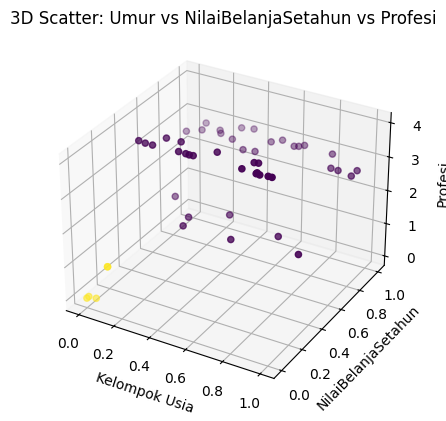

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.array(df['Umur'])
y = np.array(df['NilaiBelanjaSetahun'])
z = np.array(df['Profesi'])  

ax.scatter(x, y, z, c=df['Class'])
plt.title('3D Scatter: Umur vs NilaiBelanjaSetahun vs Profesi')
ax.set_xlabel('Kelompok Usia')
ax.set_ylabel('NilaiBelanjaSetahun')
ax.set_zlabel('Profesi')
plt.show()

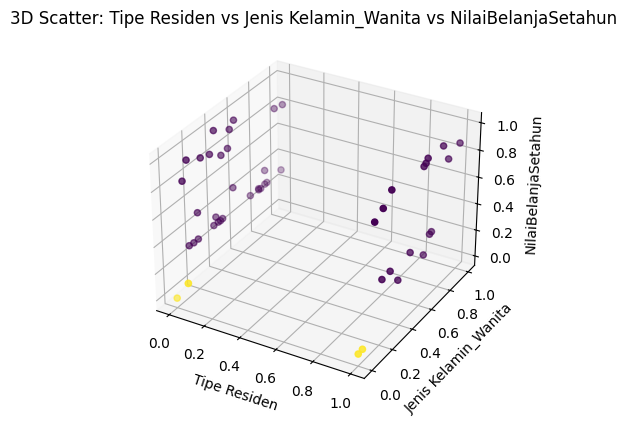

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.array(df['Tipe Residen'])
y = np.array(df['Jenis Kelamin'])
z = np.array(df['NilaiBelanjaSetahun'])  # Jika sudah di-encode numerik

ax.scatter(x, y, z, c=df['Class'])
plt.title('3D Scatter: Tipe Residen vs Jenis Kelamin_Wanita vs NilaiBelanjaSetahun')
ax.set_xlabel('Tipe Residen')
ax.set_ylabel('Jenis Kelamin_Wanita')
ax.set_zlabel('NilaiBelanjaSetahun')
plt.show()

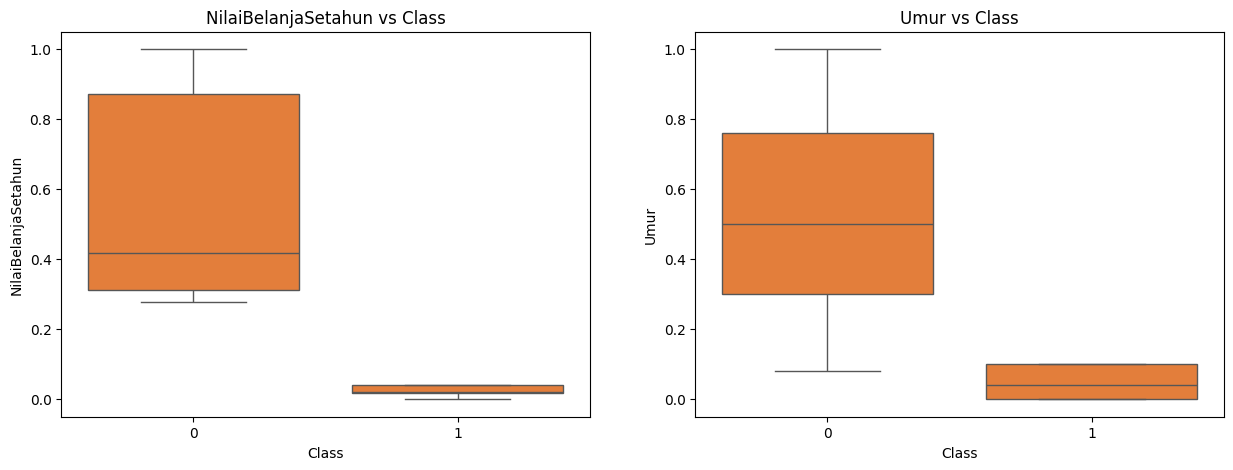

In [21]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'NilaiBelanjaSetahun', data  = df, color = '#FF781F');
plt.title('NilaiBelanjaSetahun vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'Class', y = 'Umur', data  = df, color = '#FF781F');
plt.title('Umur vs Class')

plt.show()